In [1]:
import numpy as np

### Runge-Kutta 4: dt step

\begin{equation*}
\frac{dx}{dt}=f(x)\Rightarrow x(t+dt) = \mathrm{rk4\_step}(x(t), f, dt)
\end{equation*}

In [5]:
def runge_kutta(xvec, tn, ffunc, params, dt, numel):    
    k1 = ffunc(tn, xvec, params);
    k2 = ffunc(tn+dt*0.5, xvec+k1*dt*0.5, params);
    k3 = ffunc(tn+dt*0.5, xvec+k2*dt*0.5, params);
    k4 = ffunc(tn+dt, xvec+k3*dt, params);
    return xvec + dt*(k1+2*k2+2*k3+k4)/6;

### Lorenz model

\begin{eqnarray}
  \frac{d}{d t}x &=& \sigma(y-x) \\
  \frac{d}{d t}y &=& -xz + rx -y \\
  \frac{d}{d t}z &=& xy - bz 
\end{eqnarray}


In [3]:
def lorentz(t, x, params):
    f = np.zeros(3);
    f[0] = -params[0]*(x[0]-x[1]);
    f[1] = -x[0]*x[2]+params[1]*x[0]-x[1];
    f[2] =  x[0]*x[1] - params[2]*x[2]
    return f;

### Simulation

In [20]:
params = np.zeros(3)
params[0] = 10   #sigma
params[1] = 28    # r
params[2] = 8/3 #b

xvec = np.array([3,5,10])

t0=0
dt=0.005

x = [xvec[0]]
y = [xvec[1]]
z = [xvec[2]]
for i in range(20000):
    xvec = runge_kutta(xvec, t0+i*dt, lorentz, params, dt, 3) ;
    x.append(xvec[0])
    y.append(xvec[1])
    z.append(xvec[2])
x=np.array(x)
y=np.array(y)
z=np.array(z)

### Plot

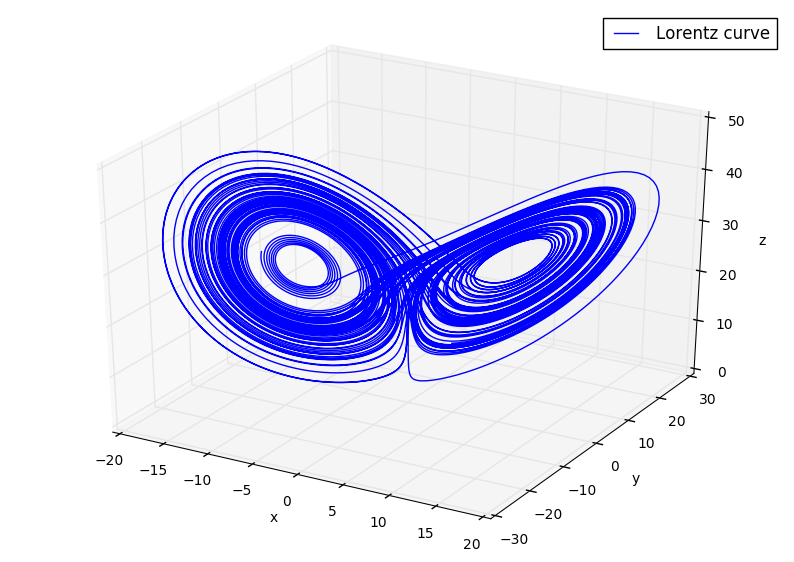

In [21]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



fig = plt.figure(0, (10,7))
ax = fig.gca(projection='3d')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.plot(x, y, z, label='Lorentz curve')
ax.legend()

plt.show()